# About Author
___
## Muhammad Ahsan Rabbi (Ihsan BT)
### Kaggle: [IhsanBT](https://www.kaggle.com/ihsanbt)
### Email: ahsanrabbi@gmail.com
### LinkedIn: [Ahsanrabbi](https://www.linkedin.com/in/ahsanrabbi/?originalSubdomain=pk)

### Data Scientist | Data Analyst


# About Dataframe
---

The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

- `Customer ID`: A unique identifier for each customer
- `Surname`: The customer's surname or last name
- `Credit Score`: A numerical value representing the customer's credit score
- `Geography`: The country where the customer resides (France, Spain or Germany)
- `Gender`: The customer's gender (Male or Female)
- `Age`: The customer's age.
- `Tenure`: The number of years the customer has been with the bank
- `Balance`: The customer's account balance
- `NumOfProducts`: The number of bank products the customer uses (e.g., savings account, credit card)
- `HasCrCard`: Whether the customer has a credit card (1 = yes, 0 = no)
- `IsActiveMember`: Whether the customer is an active member (1 = yes, 0 = no)
- `EstimatedSalary`: The estimated salary of the customer
- `Exited`: Whether the customer has churned (1 = yes, 0 = no)



# Step-1: Importing Important Liabraries
Before starting the EDA analysis, important libraries are imported.

In [115]:
# importing all liabraries that we will use in this EDA exercise.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ydata_profiling as pp
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy.stats import shapiro
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder


## Step-1a: Essential Settings
Here are some important notebook settings that is used to assist at subsequent stages.

In [147]:
# setting options to show maximum of row and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# disabling Warnings
import warnings
warnings.simplefilter(action='ignore')


# Step-2: Importing Dataset 

In [148]:
# importing dataset into df
df = pd.read_csv('train.csv')
df_test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

# Step-3: Data Overview & Exploration
## Rows and Columns of data

In [118]:
# no of rows, columns, and cells in the data
print(f"The total rows in the dataset are",len(df))
print(f"The total columns in the dataset are",len(df.columns))
print(f"The size of dataset is",df.size)

The total rows in the dataset are 165034
The total columns in the dataset are 14
The size of dataset is 2310476


## Data Type

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


## Descriptive Statistics

In [151]:
# checking Describe statistics of the dataset
df.describe()

id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  
count    165034.000000  165034.000000  
mean     112574.822734       0.211599  
std       50292.865585       0.408443  
min          11.580000       0.000000  
25%       74637.570000       0.000000  
50%      117948.000000       0.000000  
75%      155152.467500       0.000000  
max      199992.480000       1.000000

## Data Exploration

In [121]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Step-3: Data Cleaning
## Checking Missing Values in Dataset

In [153]:
# checking columns where Null values exists
df.isnull().sum()*100/len(df)

id                 0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

## Checking Duplicate Values

In [154]:
# checking duplicate rows
df.duplicated().value_counts()

False    165034
Name: count, dtype: int64

In [155]:
df.sample(5)

id  CustomerId     Surname  CreditScore Geography  Gender   Age  \
144446  144446    15782758    Mazzanti          682    France    Male  33.0   
35075    35075    15582741     Maclean          651    France  Female  43.0   
146555  146555    15593601     Lo Duca          642    France    Male  40.0   
77072    77072    15733297  Chukwukere          586   Germany    Male  40.0   
49225    49225    15590177         Mao          642    France    Male  26.0   

        Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
144446       9       0.00              2        0.0             1.0   
35075        5  124151.09              1        1.0             0.0   
146555       6  137727.33              1        1.0             1.0   
77072        1  102277.38              2        1.0             1.0   
49225        1  138023.79              2        0.0             1.0   

        EstimatedSalary  Exited  
144446        123318.73       0  
35075          88705.14       1  
146555        144870.28       0  
77072         165082.50       0  
49225         117060.20       0

# Step -4: Data Insights

## Numerical & Categorical Columns

In [156]:
# We get the numerical and categorical columns
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

## Label Encoding of Categorical Columns

In [127]:
# Specify the columns to encode
columns_to_encode = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
# Initialize a dictionary to store encoders

column_encoders = {}
# Encode each column using a separate encoder

for column in columns_to_encode:
    if column in df.columns:
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])
        column_encoders[column] = encoder
        # Access individual encoders

for column, encoder in column_encoders.items():
    print(f"Encoder for {column}: {encoder}")

Encoder for Geography: LabelEncoder()
Encoder for Gender: LabelEncoder()
Encoder for HasCrCard: LabelEncoder()
Encoder for IsActiveMember: LabelEncoder()


# Inverting Encoded Values - Optional

In [128]:
# # Invert the encoding for specific columns
# columns_to_invert = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# for column in columns_to_invert:
#     if column in column_encoders:
#         inverted_values = column_encoders[column].inverse_transform(df[column])
#         print(f"\nInverted values for '{column}':")
#         print(inverted_values)
#     else:
#         print(f"\nNo encoder found for column '{column}'.")


## Distribution of the Data

In [157]:
df.sample(5)

id  CustomerId    Surname  CreditScore Geography  Gender   Age  \
20471    20471    15691817       Ting          619    France    Male  34.0   
44032    44032    15800268      Costa          526   Germany    Male  37.0   
125618  125618    15641640    Collier          643    France    Male  33.0   
50155    50155    15631159  Calabrese          618    France    Male  34.0   
110400  110400    15622494   Mazzanti          762    France  Female  35.0   

        Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
20471        9       0.00              1        0.0             0.0   
44032        6  118050.79              2        0.0             1.0   
125618       7       0.00              2        0.0             0.0   
50155        5       0.00              2        1.0             0.0   
110400       7  125696.28              2        1.0             1.0   

        EstimatedSalary  Exited  
20471         141446.01       0  
44032          52301.15       1  
125618        164074.89       0  
50155         111402.97       0  
110400        106024.02       0

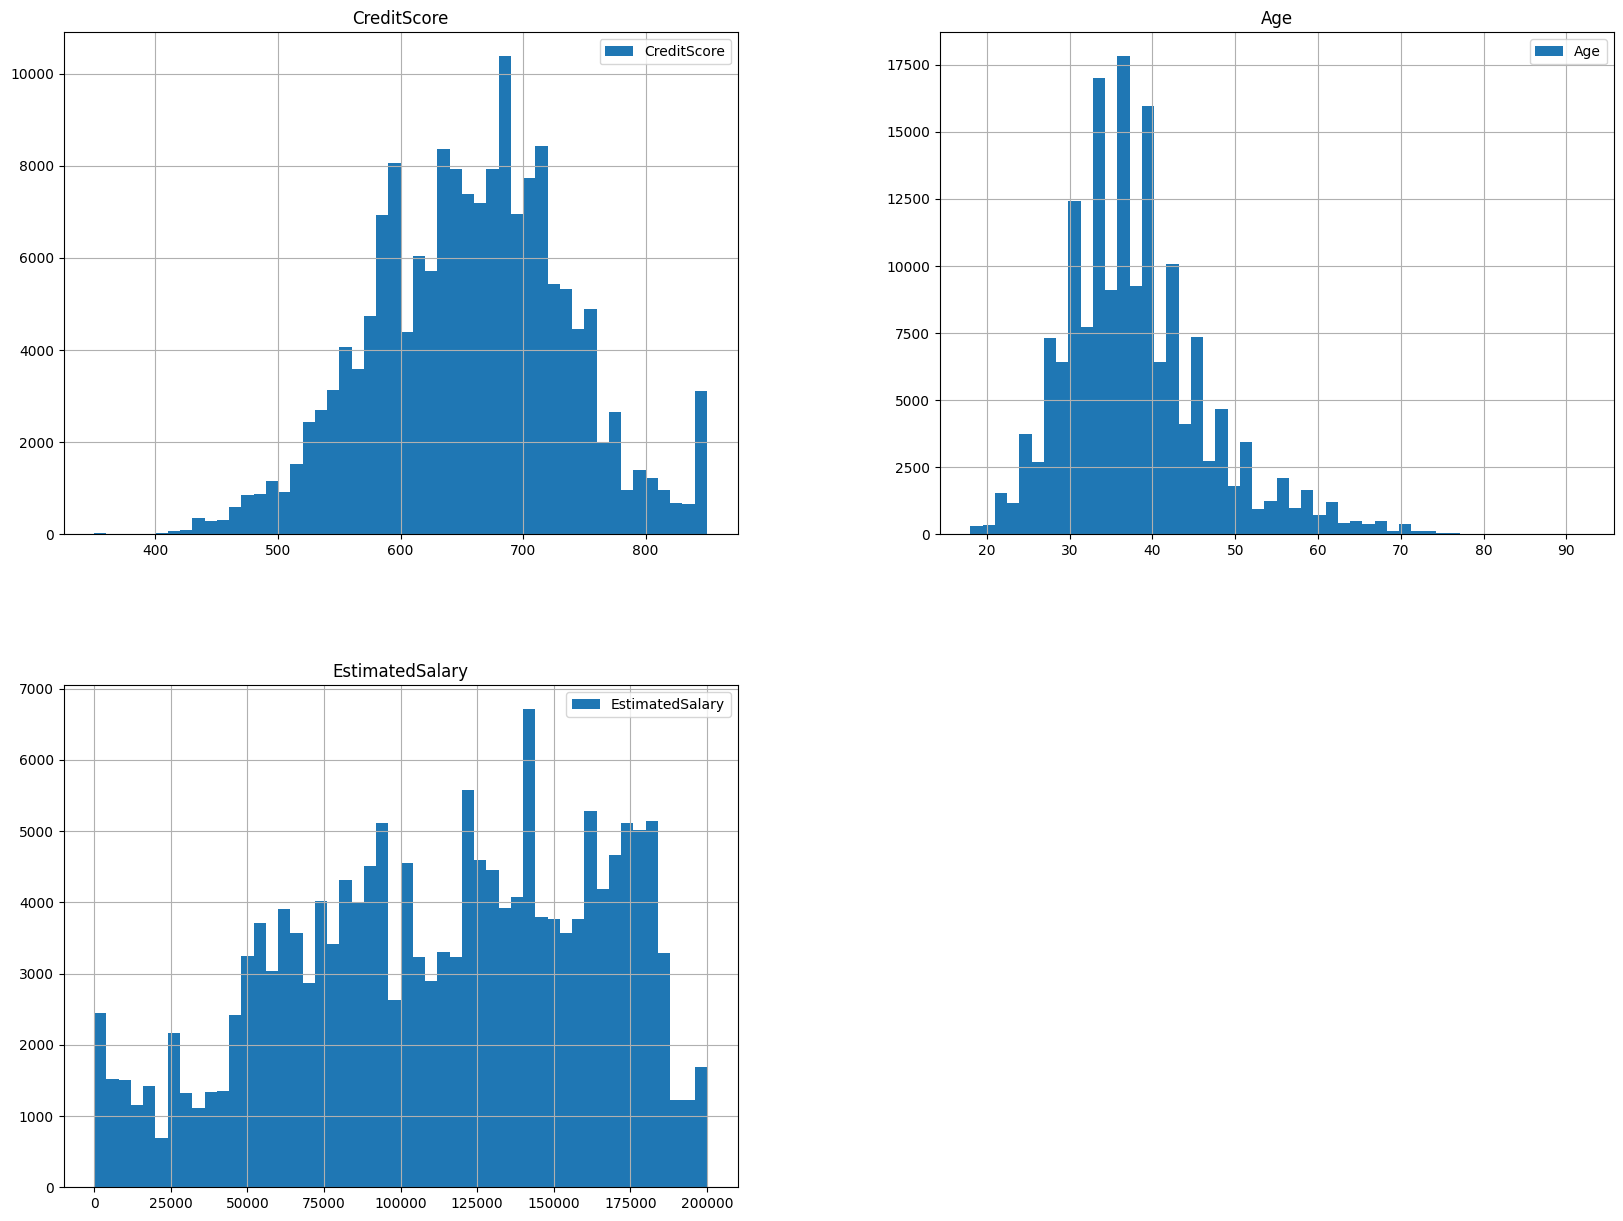

In [158]:
his_data = df[['Gender', 'CreditScore','Age','EstimatedSalary']]
his_data.hist(bins=50, figsize=(20,15), legend = True)
plt.show()

## Checking Data Balancing

In [159]:
# Count the occurrences of each unique value in the 'Exited' column
data_balance = df['Exited'].value_counts()

# Calculate the percentage of each class
data_balance_percentage = data_balance / len(df) * 100

# Print the data balance and percentage
print("Data Balance:")
print(data_balance)
print("\nData Balance Percentage:")
print(data_balance_percentage)

Data Balance:
Exited
0    130113
1     34921
Name: count, dtype: int64

Data Balance Percentage:
Exited
0    78.840118
1    21.159882
Name: count, dtype: float64


## Feature Engineering to Balance the Data

In [138]:
# define the function to scale the numeric columns before feature engineering
def fe_creation(df):
    for i in ['Geography', 'Gender']:
        for j in ['Exited']:
            df[i + "_" + j] = df[i].astype('str') + "_" + df[j].astype('str')
    return df

df = fe_creation(df)

In [140]:
# Creating Function for Encoding Categorical Features to numeric
def str_features_to_numeric(data):
    # Transforms all string features of the df to numeric features
    
    # Determination categorical features
    categorical_columns = []
    numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    features = data.columns.values.tolist()
    for col in features:
        if data[col].dtype in numerics: continue
        categorical_columns.append(col)
    
    # Encoding categorical features
    for col in categorical_columns:
        if col in data.columns:
            le = LabelEncoder()
            le.fit(list(data[col].astype(str).values))
            data[col] = le.transform(list(data[col].astype(str).values))
    
    return data

In [142]:
df = str_features_to_numeric(df)
df.head(3)

id  CustomerId  Surname  CreditScore  Geography  Gender   Age  Tenure  \
0   0    15674932     1924          668          0       1  33.0       3   
1   1    15749177     1925          627          0       1  33.0       1   
2   2    15694510     1178          678          0       1  40.0      10   

   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0      0.0              2          1               0        181449.97       0   
1      0.0              2          1               1         49503.50       0   
2      0.0              2          1               0        184866.69       0   

   Geography_Exited  Gender_Exited  
0                 0              2  
1                 0              2  
2                 0              2

In [146]:
# Count the occurrences of each unique value in the 'Exited' column
data_balance = df['Geography_Exited'].value_counts()

# Calculate the percentage of each class
data_balance_percentage = data_balance / len(df) * 100

# Print the data balance and percentage
print("Data Balance:")
print(data_balance)
print("\nData Balance Percentage:")
print(data_balance_percentage)

Data Balance:
Geography_Exited
0    130113
1     34921
Name: count, dtype: int64

Data Balance Percentage:
Geography_Exited
0    78.840118
1    21.159882
Name: count, dtype: float64


In [145]:
# Count the occurrences of each unique value in the 'Exited' column
data_balance = df['Gender_Exited'].value_counts()

# Calculate the percentage of each class
data_balance_percentage = data_balance / len(df) * 100

# Print the data balance and percentage
print("Data Balance:")
print(data_balance)
print("\nData Balance Percentage:")
print(data_balance_percentage)

Data Balance:
Gender_Exited
2    78334
0    51779
1    20105
3    14816
Name: count, dtype: int64

Data Balance Percentage:
Gender_Exited
2    47.465371
0    31.374747
1    12.182338
3     8.977544
Name: count, dtype: float64


After creating a new column with Gender and Exited, we have balanced the data.

# Correlation Matrix

In [47]:
corr = numeric_data.corr()
corr.style.background_gradient(cmap='coolwarm')

In [160]:
# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Set the threshold for high correlation
threshold = 0.5
# Find the columns with high positive correlation
high_positive_corr_cols = []
for col in corr_matrix:
    high_corr_cols = corr_matrix.index[(corr_matrix[col] > threshold) & (corr_matrix[col] != 1)].tolist()
    high_positive_corr_cols.extend(high_corr_cols)

# Find the columns with high negative correlation
high_negative_corr_cols = []
for col in corr_matrix:
    high_corr_cols = corr_matrix.index[(corr_matrix[col] < -threshold) & (corr_matrix[col] != -1)].tolist()
    high_negative_corr_cols.extend(high_corr_cols)

# Remove duplicate column names
high_positive_corr_cols = list(set(high_positive_corr_cols))
high_negative_corr_cols = list(set(high_negative_corr_cols))

# Print the columns with high positive correlation
print("Columns with high positive correlation:")
print(high_positive_corr_cols)

# Print the columns with high negative correlation
print("Columns with high negative correlation:")
print(high_negative_corr_cols)

Columns with high positive correlation:
[]
Columns with high negative correlation:
[]


Ther are not strongly relationship between the variables.